In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.cluster import KMeans
from sklearn.metrics import average_precision_score
from sklearn.metrics import confusion_matrix, roc_curve, accuracy_score, roc_auc_score, classification_report, auc
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

%matplotlib inline

#read dataset

In [6]:

df = pd.read_csv('/content/drive/MyDrive/diabetes/pima indian diebetes 2023.csv')
df

,n_pregnant,glucose_concentration,blood_pressure_(mm_Hg),skin_thickness_(mm),serum_insulin_(mu_U/ml),BMI,pedigree_function,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
df.head()

,n_pregnant,glucose_concentration,blood_pressure_(mm_Hg),skin_thickness_(mm),serum_insulin_(mu_U/ml),BMI,pedigree_function,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   n_pregnant               768 non-null    int64  
 1   glucose_concentration    768 non-null    int64  
 2   blood_pressure_(mm_Hg)   768 non-null    int64  
 3   skin_thickness_(mm)      768 non-null    int64  
 4   serum_insulin_(mu_U/ml)  768 non-null    int64  
 5   BMI                      768 non-null    float64
 6   pedigree_function        768 non-null    float64
 7   age                      768 non-null    int64  
 8   class                    768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Text(0.5, 1.0, 'correlation')

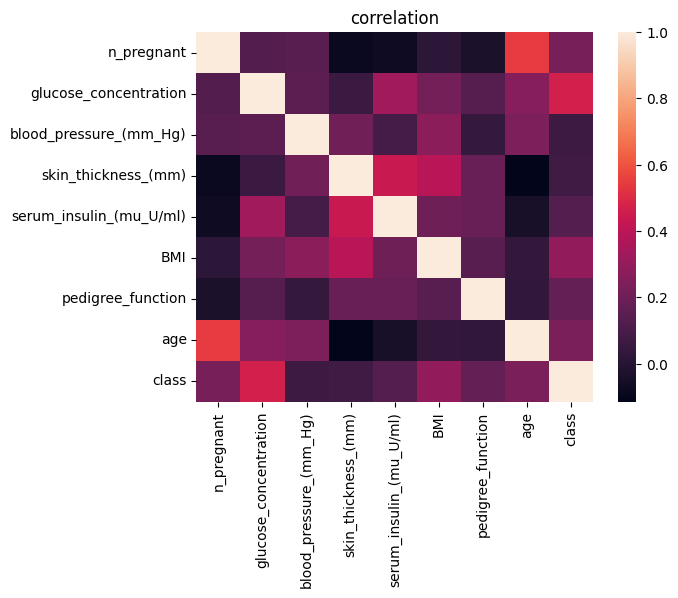

In [9]:
#data visualization
plt.figure(1)
sns.heatmap(df.corr())
plt.title('correlation')

In [10]:
#process null values drop replace mean
df=df.fillna(method='ffill')

#split data

In [11]:
x = df.drop(['class'], axis=1)
y = df['class'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 42)

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

#prepare SVC algorithm
svclass = SVC(kernel='rbf', C=100.0)

#declare the parameters 
parameters = [{'C':[1, 10, 100],
               'kernel':['linear','rbf'],
               'gamma':[0.1, 0.2, 0.3, 0.4]
              }
             ]



In [13]:
optimalmodel = GridSearchCV(estimator = svclass,
                            param_grid = parameters,
                            scoring = 'accuracy',
                            cv = 5,
                            verbose=0)

In [14]:
optimalmodel.fit(x_train, y_train)
y_pred = optimalmodel.predict(x_test)

from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy =', accuracy)

print(classification_report(y_test, y_pred))

Accuracy = 0.7489177489177489
              precision    recall  f1-score   support

           0       0.80      0.81      0.81       151
           1       0.64      0.62      0.63        80

    accuracy                           0.75       231
   macro avg       0.72      0.72      0.72       231
weighted avg       0.75      0.75      0.75       231



Confusion Matrix for the Optimal Support Vector Model using the testing dataset:
 [[123  28]
 [ 30  50]]

True Positives (TP) =  123

True Negatives (TN) =  50

Misclassified Cases =  58


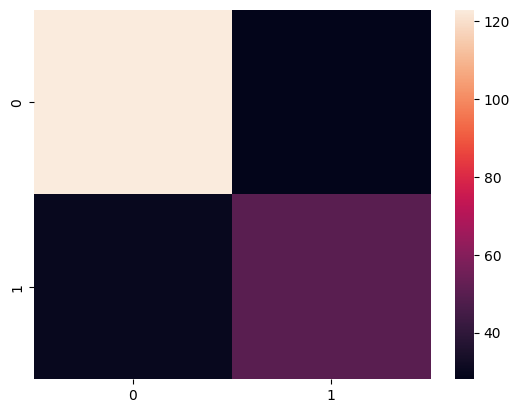

In [15]:
cm = confusion_matrix(y_test, y_pred)

misc = cm.sum() - np.trace(cm)
print('Confusion Matrix for the Optimal Support Vector Model using the testing dataset:\n', cm)
print('\nTrue Positives (TP) = ', cm[0,0])
if cm.shape[0] == 2:
    print('\nTrue Negatives (TN) = ', cm[1,1])
else:
    print('\nTrue Negatives (TN) = ', cm[1,1] + cm[2,2])
print('\nMisclassified Cases = ', misc)
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_pred)))
plt.show()

In [21]:
y_test_pred = optimalmodel.predict(x_test)
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score
best_auc_roc = roc_auc_score(y_test, y_pred)
print('Optimal Model - AUC: %.4f %% \n' % best_auc_roc)
print('Model Accuracy Score with RBF Kernel and C=100.0 using testing dataset: {0:0.4f}%'.format(accuracy_score(y_test, y_test_pred)*100))
print(classification_report(y_test, y_test_pred))

Optimal Model - AUC: 0.7198 % 

Model Accuracy Score with RBF Kernel and C=100.0 using testing dataset: 74.8918%
              precision    recall  f1-score   support

           0       0.80      0.81      0.81       151
           1       0.64      0.62      0.63        80

    accuracy                           0.75       231
   macro avg       0.72      0.72      0.72       231
weighted avg       0.75      0.75      0.75       231

